In [1]:
import sqlite3
print("SQLite fonctionne ✅")


SQLite fonctionne ✅


In [2]:
import sqlite3

# Crée la base (dans ton dossier actuel, dans le projet)
conn = sqlite3.connect("data/oil_production.db")

# Ferme la connexion pour vérifier que le fichier est bien créé
conn.close()
print("Base SQLite créée ✅ (data/oil_production.db)")


Base SQLite créée ✅ (data/oil_production.db)


In [4]:
import sqlite3

conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

# ================================
# 1️⃣ Ajouter temporairement une colonne inserted_by_script
# ================================
tables = ['sites', 'wells', 'teams', 'interventions', 'production', 'incidents']
for table in tables:
    try:
        cursor.execute(f"ALTER TABLE {table} ADD COLUMN inserted_by_script INTEGER DEFAULT 0;")
    except sqlite3.OperationalError:
        # La colonne existe déjà
        pass

# ================================
# 2️⃣ Marquer les lignes insérées par le script
# ================================
cursor.execute("""
UPDATE sites
SET inserted_by_script = 1
WHERE name IN ('Site of Tunis', 'Site of Sfax', 'Site of Gabes', 'Site of Djerba',
               'Hassi Messaoud Site', 'Doha Site', 'Riyadh Site')
""")

cursor.execute("""
UPDATE wells
SET inserted_by_script = 1
WHERE name IN ('Well A1', 'Well B1', 'Well C1', 'Well D1', 'INT-01 Well', 'INT-02 Well', 'INT-03 Well')
""")

cursor.execute("""
UPDATE teams
SET inserted_by_script = 1
WHERE name IN ('North Team', 'South Team', 'International Team', 'Logistics Team')
""")

cursor.execute("""
UPDATE interventions
SET inserted_by_script = 1
WHERE operation IN ('Inspection', 'Repair', 'Drilling', 'Cleaning')
""")

cursor.execute("""
UPDATE production
SET inserted_by_script = 1
WHERE quantity_produced IN (1200.50, 1180.40, 950.20, 2100.70, 2085.60)
""")

cursor.execute("""
UPDATE incidents
SET inserted_by_script = 1
WHERE incident_type IN ('Minor leak', 'Power outage', 'Engine overheating', 'Major leak')
""")

# ================================
# 3️⃣ Supprimer les lignes marquées
# ================================
for table in tables:
    cursor.execute(f"DELETE FROM {table} WHERE inserted_by_script = 1")

conn.commit()

# ================================
# 4️⃣ Supprimer la colonne inserted_by_script
# ================================
# SQLite ne supporte pas DROP COLUMN directement, donc on recrée les tables sans cette colonne
def recreate_table_without_column(table_name):
    # Récupérer la structure de la table
    cursor.execute(f"PRAGMA table_info({table_name})")
    cols = [col[1] for col in cursor.fetchall() if col[1] != 'inserted_by_script']
    col_str = ', '.join(cols)

    # Créer une table temporaire
    cursor.execute(f"ALTER TABLE {table_name} RENAME TO {table_name}_old;")
    cursor.execute(f"CREATE TABLE {table_name} AS SELECT {col_str} FROM {table_name}_old;")
    cursor.execute(f"DROP TABLE {table_name}_old;")

for table in tables:
    recreate_table_without_column(table)

conn.commit()
conn.close()

print("✅ Les lignes ajoutées par le script ont été supprimées et la colonne temporaire supprimée !")


✅ Les lignes ajoutées par le script ont été supprimées et la colonne temporaire supprimée !


In [8]:
import sqlite3

conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

# Récupérer toutes les tables sauf les tables système
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';")
tables = cursor.fetchall()

# Supprimer chaque table utilisateur
for table in tables:
    cursor.execute(f"DROP TABLE IF EXISTS {table[0]}")

conn.commit()
conn.close()

print("✅ Toutes les tables utilisateurs ont été supprimées !")


✅ Toutes les tables utilisateurs ont été supprimées !


In [9]:
sql_script = """ 
PRAGMA foreign_keys = ON;

-- ============================================
-- TABLE 1: SITES (Oil Fields / Locations)
-- ============================================
CREATE TABLE IF NOT EXISTS sites (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    location TEXT,
    description TEXT
);

INSERT INTO sites (name, location, description) VALUES
('Permian Basin', 'Texas, USA', 'Largest US oilfield with extensive operations'),
('Marcellus Shale', 'Pennsylvania, USA', 'Major gas-producing shale formation'),
('Kern River', 'California, USA', 'Historical oilfield, mature production'),
('Eagle Ford Shale', 'Texas, USA', 'Major shale play with high production'),
('Bakken Formation', 'North Dakota, USA', 'Tight oil formation, significant reserves'),
('Niobrara Shale', 'Colorado, USA', 'Emerging shale play with growth potential'),
('Haynesville Shale', 'Louisiana, USA', 'Gas-rich shale formation'),
('Vaca Muerta', 'Argentina', 'Second largest shale reserves globally'),
('Troll Field', 'North Sea, Norway', 'Major offshore field'),
('Ghawar Field', 'Saudi Arabia', 'World''s largest conventional oil field'),
('Safaniyah Field', 'Saudi Arabia', 'Largest offshore oilfield'),
('Kashagan', 'Caspian Sea, Kazakhstan', 'Major offshore discovery');

-- ============================================
-- TABLE 2: WELLS
-- ============================================
CREATE TABLE IF NOT EXISTS wells (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    site_id INTEGER,
    name TEXT,
    depth REAL,
    status TEXT,
    FOREIGN KEY(site_id) REFERENCES sites(id) ON DELETE CASCADE
);

INSERT INTO wells (site_id, name, depth, status) VALUES
(1, 'API-42131456780001', 9800.5, 'Active'),
(1, 'API-42131456780002', 10120.0, 'Inactive'),
(1, 'API-42131456780003', 8950.25, 'Active'),
(1, 'API-42131456780004', 11200.0, 'Maintenance'),
(2, 'API-37100123450001', 8900.75, 'Active'),
(2, 'API-37100123450002', 9100.0, 'Active'),
(3, 'API-06007123450001', 6500.0, 'Active'),
(3, 'API-06007123450002', 6750.5, 'Inactive'),
(4, 'API-48205987650001', 12300.0, 'Active'),
(4, 'API-48205987650002', 11800.75, 'Active'),
(5, 'API-33025456780001', 10500.0, 'Active'),
(5, 'API-33025456780002', 10800.25, 'Maintenance'),
(6, 'API-08001234567001', 7800.0, 'Active'),
(7, 'API-22015789012001', 9200.5, 'Active'),
(9, 'API-TROLL-001', 1680.0, 'Active'),
(10, 'API-GHAWAR-001', 14000.0, 'Active');

-- ============================================
-- TABLE 3: TEAMS
-- ============================================
CREATE TABLE IF NOT EXISTS teams (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    contact TEXT
);

INSERT INTO teams (name, contact) VALUES
('Alpha Operations', 'ops.alpha@oilco.com'),
('Well Servicing East', 'service.east@oilco.com'),
('West Drillers', 'west.dril@oilco.com'),
('Delta Maintenance', 'maint.delta@oilco.com'),
('Echo Intervention Team', 'interv.echo@oilco.com'),
('Foxtrot Production', 'prod.foxtrot@oilco.com'),
('Golf Offshore Services', 'offshore.golf@oilco.com'),
('Hotel Wireline Services', 'wireline.hotel@oilco.com'),
('India Safety Response', 'safety.india@oilco.com'),
('Juliet Completion Team', 'completion.juliet@oilco.com'),
('Kilo Emergency Response', 'emergency.kilo@oilco.com'),
('Lima Technical Support', 'tech.lima@oilco.com');

-- ============================================
-- TABLE 4: INTERVENTIONS
-- ============================================
CREATE TABLE IF NOT EXISTS interventions (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    well_id INTEGER,
    team_id INTEGER,
    start_time TEXT,
    end_time TEXT,
    operation TEXT,
    notes TEXT,
    FOREIGN KEY(well_id) REFERENCES wells(id) ON DELETE CASCADE,
    FOREIGN KEY(team_id) REFERENCES teams(id) ON DELETE CASCADE
);

INSERT INTO interventions (well_id, team_id, start_time, end_time, operation, notes) VALUES
(1, 1, '2025-04-01 07:30', '2025-04-01 09:30', 'Wireline Logging', 'Routine operation, no issues observed.'),
(2, 2, '2025-05-15 08:00', '2025-05-15 13:00', 'Snubbing Operation', 'High pressure snubbing, Class 2, success.'),
(1, 3, '2025-04-20 06:00', '2025-04-20 06:45', 'Workover', 'Minor maintenance, resolved valve issue.'),
(3, 4, '2025-03-10 10:00', '2025-03-10 16:00', 'Well Stimulation', 'Acid treatment completed successfully.'),
(5, 5, '2025-02-28 09:15', '2025-02-28 12:30', 'Tubing Replacement', 'Full tubing run, no complications.'),
(6, 6, '2025-06-05 07:00', '2025-06-05 14:00', 'Production Optimization', 'Choke adjustment and flow optimization.'),
(4, 7, '2025-01-15 08:30', '2025-01-15 11:00', 'Safety Inspection', 'BOP inspection and pressure test.'),
(7, 8, '2025-05-22 06:00', '2025-05-22 18:00', 'Well Logging', 'Comprehensive logging suite completed.'),
(8, 9, '2025-03-05 12:00', '2025-03-05 14:00', 'Emergency Response', 'Pressure relief valve replacement.'),
(9, 10, '2025-04-10 08:00', '2025-04-10 20:00', 'Well Completion', 'Perforations and screen installation.'),
(10, 11, '2025-02-14 09:00', '2025-02-14 17:00', 'Downhole Tools Repair', 'Tool retrieval and maintenance.'),
(11, 12, '2025-06-20 07:30', '2025-06-20 10:15', 'Pressure Test', 'Formation integrity test passed.'),
(12, 1, '2025-05-01 08:00', '2025-05-01 12:00', 'Sand Control', 'Screen installation and testing.'),
(3, 2, '2025-04-25 09:30', '2025-04-25 11:45', 'Flow Line Check', 'Pipeline inspection completed.'),
(5, 3, '2025-06-10 10:00', '2025-06-10 15:30', 'Corrosion Monitoring', 'Corrosion probe installed and baseline set.');

-- ============================================
-- TABLE 5: PRODUCTION
-- ============================================
CREATE TABLE IF NOT EXISTS production (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    well_id INTEGER,
    timestamp TEXT,
    flow_rate REAL,
    pressure REAL,
    temperature REAL,
    quantity_produced REAL,
    FOREIGN KEY(well_id) REFERENCES wells(id) ON DELETE CASCADE
);

INSERT INTO production (well_id, timestamp, flow_rate, pressure, temperature, quantity_produced) VALUES
(1, '2025-01-01', 350.5, 2400, 88.5, 120.0),
(1, '2025-02-01', 355.0, 2490, 91.2, 123.5),
(1, '2025-03-01', 348.25, 2380, 87.8, 118.5),
(1, '2025-04-01', 360.75, 2510, 92.1, 125.2),
(1, '2025-05-01', 365.0, 2550, 93.5, 128.0),
(1, '2025-06-01', 358.5, 2420, 90.2, 122.5),
(2, '2025-01-01', 290.0, 2350, 82.0, 100.0),
(2, '2025-02-01', 295.5, 2390, 84.5, 105.5),
(2, '2025-03-01', 285.75, 2310, 80.8, 98.0),
(2, '2025-04-01', 298.0, 2420, 86.2, 108.0),
(2, '2025-05-01', 302.5, 2450, 87.9, 110.5),
(2, '2025-06-01', 288.0, 2360, 81.5, 102.0),
(3, '2025-01-01', 420.0, 2800, 95.0, 145.0),
(3, '2025-02-01', 425.5, 2850, 97.2, 148.5),
(3, '2025-03-01', 415.25, 2780, 94.1, 142.0),
(3, '2025-04-01', 430.0, 2900, 98.5, 152.0),
(4, '2025-01-01', 275.0, 2200, 78.5, 95.0),
(4, '2025-02-01', 278.5, 2240, 80.0, 97.5),
(5, '2025-01-01', 385.0, 2650, 89.5, 132.0),
(6, '2025-01-01', 320.0, 2550, 91.0, 110.0),
(6, '2025-02-01', 325.5, 2600, 92.5, 114.0),
(7, '2025-01-01', 410.0, 2750, 94.0, 140.0),
(9, '2025-01-01', 750.0, 3200, 105.0, 250.0),
(10, '2025-01-01', 1200.0, 3500, 110.0, 380.0),
(11, '2025-01-01', 550.0, 3000, 100.5, 185.0);

-- ============================================
-- TABLE 6: INCIDENTS
-- ============================================
CREATE TABLE IF NOT EXISTS incidents (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    well_id INTEGER,
    incident_type TEXT,
    severity TEXT,
    date TEXT,
    description TEXT,
    resolved INTEGER DEFAULT 0,
    FOREIGN KEY(well_id) REFERENCES wells(id) ON DELETE CASCADE
);

INSERT INTO incidents (well_id, incident_type, severity, date, description, resolved) VALUES
(1, 'Blowout', 'High', '2024-12-21', 'Pressurization exceeded control threshold. Contained, no injuries.', 1),
(2, 'Leak', 'Medium', '2024-11-12', 'Detected small tubing leak, repaired during workover.', 1),
(1, 'Valve Failure', 'Low', '2025-01-18', 'Valve replacement required due to slow response.', 1),
(3, 'Equipment Failure', 'Medium', '2025-02-05', 'Pump failure, replaced with backup unit.', 1),
(4, 'Pressure Spike', 'High', '2025-03-12', 'Unexpected pressure surge, safety vented, investigated.', 1),
(5, 'Corrosion Issue', 'Medium', '2025-01-25', 'Tubing corrosion detected, inhibitor treatment applied.', 1),
(6, 'Gas Leak', 'Low', '2025-02-14', 'Minor gas release at surface, sealed with patch.', 1),
(7, 'Fire Incident', 'High', '2024-10-08', 'Small fire at wellhead, extinguished, investigation ongoing.', 1),
(8, 'Production Loss', 'Medium', '2025-04-03', 'Unexpected production drop, choke adjusted.', 1),
(9, 'Temperature Anomaly', 'Low', '2025-03-20', 'Abnormal temperature reading, sensor calibrated.', 1),
(10, 'Sand Production', 'Medium', '2025-05-10', 'Sand entry detected, screen installed to prevent further production.', 1),
(11, 'Plug Failure', 'High', '2025-06-01', 'Cement plug failed, re-plugging initiated.', 0),
(12, 'Fluid Loss', 'Medium', '2025-05-15', 'Lost circulation during drilling, addressed with lost circulation material.', 1),
(3, 'Fatigue Crack', 'Medium', '2025-04-22', 'Minor crack in casing detected via imaging, monitoring ongoing.', 0),
(1, 'Scale Buildup', 'Low', '2025-06-05', 'Mineral scale buildup reduced flow, chemical treatment applied.', 1);


INSERT INTO sites (name, location, description) VALUES
('Prudhoe Bay', 'Alaska, USA', 'Largest oil field in North America'),
('Burgan Field', 'Kuwait', 'Second largest oil field worldwide'),
('Safaniyah', 'Saudi Arabia', 'Largest offshore oil field'),
('Cantarell Field', 'Mexico', 'Major Gulf of Mexico field'),
('Statfjord Field', 'North Sea, Norway', 'Historic offshore oil field'),
('Ekofisk Field', 'North Sea, Norway', 'Pioneer of offshore drilling'),
('Brent Field', 'North Sea, UK', 'Benchmark oil field'),
('Forties Field', 'North Sea, UK', 'Mature North Sea field'),
('Marlim Field', 'Brazil', 'Deep-water offshore giant'),
('Lula Field', 'Brazil', 'Pre-salt deep-water discovery'),
('Sakhalin Island', 'Russia', 'Far East oil and gas'),
('Tengiz Field', 'Kazakhstan', 'Super-giant oil field'),
('Athabasca Oil Sands', 'Canada', 'Vast oil sands deposit'),
('Orinoco Belt', 'Venezuela', 'Heavy oil reserves'),
('Jubilee Field', 'Ghana', 'West African discovery'),
('Leviathan Field', 'Eastern Mediterranean', 'Gas field discovery'),
('Groningen Field', 'Netherlands', 'Historic gas field'),
('Johan Sverdrup', 'North Sea, Norway', 'Recent mega field'),
('Yamal Peninsula', 'Russia', 'Arctic oil and gas region'),
('Campos Basin', 'Brazil', 'Prolific offshore region');

-- ============================================
-- ADDITIONAL WELLS (30 more records)
-- ============================================
INSERT INTO wells (site_id, name, depth, status) VALUES
(13, 'API-02103189870001', 9500.0, 'Active'),
(13, 'API-02103189870002', 10200.5, 'Active'),
(13, 'API-02103189870003', 9850.75, 'Maintenance'),
(14, 'API-25100234560001', 8500.0, 'Active'),
(14, 'API-25100234560002', 8700.25, 'Inactive'),
(15, 'API-31001567890001', 11500.0, 'Active'),
(16, 'API-16700456789001', 12800.0, 'Active'),
(17, 'API-22200789012001', 9200.0, 'Active'),
(18, 'API-15100345678001', 7800.5, 'Active'),
(19, 'API-30400123456001', 8900.0, 'Active'),
(20, 'API-30400123456002', 9100.25, 'Maintenance'),
(21, 'API-09700567890001', 14200.0, 'Active'),
(22, 'API-35500123456001', 10500.0, 'Active'),
(23, 'API-23800456789001', 11800.75, 'Active'),
(24, 'API-41000789012001', 8200.0, 'Active'),
(25, 'API-27100345678001', 13500.0, 'Maintenance'),
(26, 'API-26400123456001', 9700.5, 'Active'),
(27, 'API-52000234567001', 10900.0, 'Active'),
(28, 'API-40900567890001', 12100.25, 'Active'),
(29, 'API-14100789012001', 8400.0, 'Inactive'),
(13, 'API-02103189870004', 9750.0, 'Active'),
(14, 'API-25100234560003', 8600.75, 'Active'),
(15, 'API-31001567890002', 11600.5, 'Maintenance'),
(16, 'API-16700456789002', 12900.0, 'Active'),
(17, 'API-22200789012002', 9300.25, 'Active'),
(18, 'API-15100345678002', 7900.0, 'Active'),
(19, 'API-30400123456003', 9000.5, 'Active'),
(20, 'API-30400123456004', 9200.0, 'Active'),
(21, 'API-09700567890002', 14300.75, 'Active'),
(22, 'API-35500123456002', 10600.0, 'Maintenance');

-- ============================================
-- ADDITIONAL TEAMS (18 more records)
-- ============================================
INSERT INTO teams (name, contact) VALUES
('Mike Offshore Specialists', 'offshore.mike@oilco.com'),
('November Field Operations', 'fieldops.november@oilco.com'),
('Oscar Well Testing', 'testing.oscar@oilco.com'),
('Papa Drilling Services', 'drilling.papa@oilco.com'),
('Quebec Pressure Control', 'pressure.quebec@oilco.com'),
('Romeo Completion Services', 'completion.romeo@oilco.com'),
('Sierra Intervention Team', 'intervention.sierra@oilco.com'),
('Tango Production Team', 'production.tango@oilco.com'),
('Uniform Maintenance Crew', 'maintenance.uniform@oilco.com'),
('Victor Safety Team', 'safety.victor@oilco.com'),
('Whiskey Emergency Response', 'emergency.whiskey@oilco.com'),
('X-ray Technical Support', 'tech.xray@oilco.com'),
('Yankee Operations', 'ops.yankee@oilco.com'),
('Zulu Drilling Experts', 'drilling.zulu@oilco.com'),
('Aurora Subsurface Team', 'subsurface.aurora@oilco.com'),
('Bravo Reservoir Engineering', 'reservoir.bravo@oilco.com'),
('Charlie Production Optimization', 'optimization.charlie@oilco.com'),
('Delta Downhole Tools', 'tools.delta@oilco.com');

-- ============================================
-- ADDITIONAL INTERVENTIONS (35 more records)
-- ============================================
INSERT INTO interventions (well_id, team_id, start_time, end_time, operation, notes) VALUES
(13, 1, '2025-01-05 08:00', '2025-01-05 10:30', 'Well Inspection', 'Routine inspection completed without issues.'),
(14, 2, '2025-01-10 07:00', '2025-01-10 14:00', 'Sand Cleanout', 'Sand removal and screen installation.'),
(15, 3, '2025-01-15 09:00', '2025-01-15 11:00', 'Pressure Maintenance', 'Pressure test and gauge calibration.'),
(16, 4, '2025-01-20 08:30', '2025-01-20 12:00', 'Subsurface Inspection', 'Downhole pressure survey completed.'),
(17, 5, '2025-01-25 07:30', '2025-01-25 09:45', 'Tubing Inspection', 'Visual inspection, minor corrosion noted.'),
(18, 6, '2025-02-01 08:00', '2025-02-01 16:00', 'Workover Operation', 'Complete tubing replacement, success.'),
(19, 7, '2025-02-05 10:00', '2025-02-05 12:30', 'Safety Check', 'BOP system test passed all criteria.'),
(20, 8, '2025-02-10 06:00', '2025-02-10 18:00', 'Well Completion', 'Perforations installed, tested successfully.'),
(21, 9, '2025-02-15 09:00', '2025-02-15 13:00', 'Maintenance Run', 'Preventive maintenance completed.'),
(22, 10, '2025-02-20 08:00', '2025-02-20 15:00', 'Stimulation Job', 'Acid job completed, production increased.'),
(23, 11, '2025-02-25 07:00', '2025-02-25 11:00', 'Emergency Repair', 'Valve replacement under high pressure.'),
(24, 12, '2025-03-01 08:30', '2025-03-01 10:15', 'Flow Test', 'Production flow test successful.'),
(25, 13, '2025-03-05 09:00', '2025-03-05 17:00', 'Sidetrack Drilling', 'Sidetrack completed, in zone.'),
(26, 14, '2025-03-10 07:30', '2025-03-10 09:00', 'Log Run', 'Wireline logging completed.'),
(27, 15, '2025-03-15 08:00', '2025-03-15 14:00', 'Cement Plug', 'Cement plugs set correctly.'),
(28, 16, '2025-03-20 10:00', '2025-03-20 12:00', 'Formation Test', 'Drill stem test completed successfully.'),
(29, 17, '2025-03-25 06:00', '2025-03-25 18:00', 'Completion Assembly', 'Downhole assembly installed.'),
(30, 18, '2025-04-01 09:00', '2025-04-01 11:30', 'Pressure Relief', 'Pressure relief system installed.'),
(4, 1, '2025-04-05 08:00', '2025-04-05 10:00', 'Routine Maintenance', 'Regular maintenance completed.'),
(6, 2, '2025-04-10 07:30', '2025-04-10 13:30', 'Production Enhancement', 'Choke adjustment improved production.'),
(8, 3, '2025-04-15 09:00', '2025-04-15 11:00', 'Inspection Run', 'Well condition checked, all normal.'),
(10, 4, '2025-04-20 08:00', '2025-04-20 16:00', 'Workover', 'Well rejuvenation job completed.'),
(12, 5, '2025-04-25 07:00', '2025-04-25 09:00', 'Gauge Run', 'Downhole gauges installed successfully.'),
(13, 6, '2025-05-01 08:30', '2025-05-01 12:00', 'Drilling Continuation', 'Drilling resumed after maintenance.'),
(14, 7, '2025-05-05 10:00', '2025-05-05 14:00', 'Testing Operation', 'Well testing completed successfully.'),
(15, 8, '2025-05-10 06:00', '2025-05-10 12:00', 'Completion Work', 'Screen and gravel pack installed.'),
(16, 9, '2025-05-15 09:00', '2025-05-15 11:00', 'Final Inspection', 'Completion inspection passed.'),
(17, 10, '2025-05-20 08:00', '2025-05-20 10:30', 'Flow Line Check', 'Surface facilities inspection done.'),
(18, 11, '2025-05-25 07:30', '2025-05-25 09:30', 'Valve Maintenance', 'All valves serviced and tested.'),
(19, 12, '2025-06-01 08:00', '2025-06-01 16:00', 'Major Intervention', 'Major workover completed on schedule.'),
(20, 13, '2025-06-05 09:00', '2025-06-05 11:00', 'Production Monitoring', 'Production rates monitored and recorded.'),
(21, 14, '2025-06-10 07:00', '2025-06-10 13:00', 'Drilling Support', 'Support for drilling operations provided.'),
(22, 15, '2025-06-15 08:30', '2025-06-15 10:30', 'Well Abandonment Prep', 'Abandonment procedures initiated.'),
(23, 16, '2025-06-20 09:00', '2025-06-20 15:00', 'Final Test', 'Final well testing and certification.'),
(24, 17, '2025-06-25 06:00', '2025-06-25 14:00', 'Commissioning', 'Well commissioned for production.');

-- ============================================
-- ADDITIONAL PRODUCTION RECORDS (40+ more records)
-- ============================================
INSERT INTO production (well_id, timestamp, flow_rate, pressure, temperature, quantity_produced) VALUES
(13, '2025-01-01', 380.0, 2650, 92.0, 130.0),
(13, '2025-02-01', 385.5, 2700, 94.5, 135.0),
(13, '2025-03-01', 378.25, 2630, 91.2, 128.5),
(13, '2025-04-01', 390.0, 2750, 95.8, 138.0),
(13, '2025-05-01', 395.5, 2800, 97.2, 142.0),
(14, '2025-01-01', 310.0, 2500, 85.0, 108.0),
(14, '2025-02-01', 315.5, 2550, 87.5, 112.0),
(14, '2025-03-01', 305.25, 2480, 83.8, 104.5),
(14, '2025-04-01', 320.0, 2600, 89.2, 115.0),
(14, '2025-05-01', 325.5, 2650, 91.0, 118.0),
(15, '2025-01-01', 440.0, 2950, 98.0, 155.0),
(15, '2025-02-01', 445.5, 3000, 100.5, 159.0),
(15, '2025-03-01', 435.25, 2920, 97.2, 152.0),
(15, '2025-04-01', 450.0, 3050, 101.8, 162.0),
(15, '2025-05-01', 455.5, 3100, 103.2, 166.0),
(16, '2025-01-01', 520.0, 3200, 105.5, 185.0),
(16, '2025-02-01', 525.5, 3250, 107.0, 188.0),
(16, '2025-03-01', 515.25, 3170, 104.2, 182.0),
(16, '2025-04-01', 530.0, 3300, 108.8, 192.0),
(16, '2025-05-01', 535.5, 3350, 110.2, 196.0),
(17, '2025-01-01', 400.0, 2800, 93.0, 140.0),
(17, '2025-02-01', 405.5, 2850, 95.5, 144.0),
(17, '2025-03-01', 395.25, 2770, 91.8, 137.0),
(17, '2025-04-01', 410.0, 2900, 96.2, 147.0),
(17, '2025-05-01', 415.5, 2950, 98.0, 151.0),
(18, '2025-01-01', 460.0, 3100, 102.0, 168.0),
(18, '2025-02-01', 465.5, 3150, 104.5, 172.0),
(18, '2025-03-01', 455.25, 3070, 101.2, 165.0),
(18, '2025-04-01', 470.0, 3200, 105.8, 175.0),
(18, '2025-05-01', 475.5, 3250, 107.2, 179.0),
(19, '2025-01-01', 340.0, 2650, 89.0, 120.0),
(19, '2025-02-01', 345.5, 2700, 91.5, 124.0),
(19, '2025-03-01', 335.25, 2620, 87.8, 116.0),
(19, '2025-04-01', 350.0, 2750, 93.2, 128.0),
(19, '2025-05-01', 355.5, 2800, 95.0, 132.0),
(20, '2025-01-01', 380.0, 2750, 91.5, 135.0),
(20, '2025-02-01', 385.5, 2800, 94.0, 139.0),
(20, '2025-03-01', 375.25, 2720, 90.2, 131.5),
(20, '2025-04-01', 390.0, 2850, 95.8, 142.0),
(20, '2025-05-01', 395.5, 2900, 97.2, 146.0),
(21, '2025-01-01', 620.0, 3400, 112.0, 215.0),
(21, '2025-02-01', 625.5, 3450, 114.5, 220.0),
(21, '2025-03-01', 615.25, 3370, 111.2, 212.0),
(21, '2025-04-01', 630.0, 3500, 116.8, 225.0),
(21, '2025-05-01', 635.5, 3550, 118.2, 230.0);

-- ============================================
-- ADDITIONAL INCIDENTS (25+ more records)
-- ============================================
INSERT INTO incidents (well_id, incident_type, severity, date, description, resolved) VALUES
(13, 'Pressure Build-up', 'Medium', '2025-01-12', 'Pressure accumulated in annulus, bled off safely.', 1),
(14, 'Flow Restriction', 'Low', '2025-01-18', 'Partial blockage detected, cleared with pig run.', 1),
(15, 'Equipment Malfunction', 'Medium', '2025-02-03', 'Surface pump failed, replaced with backup.', 1),
(16, 'Sensor Failure', 'Low', '2025-02-08', 'Pressure sensor malfunction, recalibrated.', 1),
(17, 'Gas Intrusion', 'High', '2025-02-14', 'Unexpected gas influx, controlled and managed.', 1),
(18, 'Tubing Wear', 'Medium', '2025-02-22', 'Accelerated tubing wear detected, replacement scheduled.', 0),
(19, 'Scale Deposit', 'Low', '2025-03-05', 'Scale buildup in production line, chemical treatment applied.', 1),
(20, 'Emulsion Problem', 'Medium', '2025-03-11', 'Water-oil emulsion issue, resolved with demulsifier.', 1),
(21, 'Loss of Circulation', 'High', '2025-03-18', 'Circulation lost during operations, regained after intervention.', 1),
(22, 'Thermal Issue', 'Low', '2025-03-25', 'Temperature spike detected, heat exchanger cleaned.', 1),
(23, 'Mechanical Failure', 'High', '2025-04-02', 'Downhole tool failure, tool fishing operation initiated.', 0),
(24, 'Micro-seismic Activity', 'Low', '2025-04-09', 'Induced seismicity detected during stimulation, activity ceased.', 1),
(25, 'Pipeline Corrosion', 'Medium', '2025-04-16', 'Localized corrosion found, patch applied as temporary fix.', 1),
(26, 'Power Supply Issue', 'Medium', '2025-04-23', 'Electrical power failure at wellhead, backup generator engaged.', 1),
(27, 'Water Ingress', 'High', '2025-05-01', 'Unexpected water production, investigation ongoing.', 0),
(28, 'Perforation Damage', 'Medium', '2025-05-08', 'Perforation zone damage detected, remediation planned.', 0),
(29, 'Compressor Failure', 'High', '2025-05-15', 'Surface compressor failed, entire system affected.', 1),
(30, 'Casing Deformation', 'High', '2025-05-22', 'Casing deformation observed, reinforcement initiated.', 0),
(4, 'Minor Leak', 'Low', '2025-06-01', 'Small leak at connection, retightened and monitored.', 1),
(6, 'Production Anomaly', 'Medium', '2025-06-08', 'Unexpected production drop, choke adjustment corrected it.', 1),
(8, 'Pipe Fatigue', 'Medium', '2025-06-15', 'Fatigue crack detected in piping, pipe section replaced.', 1),
(10, 'System Shutdown', 'High', '2025-06-22', 'Unplanned system shutdown due to safety alarm, resolved.', 1),
(12, 'Instrumentation Drift', 'Low', '2025-06-29', 'Instrument reading drift detected, recalibration performed.', 1),
(1, 'Annular Pressure', 'Medium', '2025-01-30', 'Annular pressure increase detected and monitored.', 1),
(2, 'Mud Gas Ratio Change', 'Low', '2025-02-20', 'Unexpected mud gas ratio change, formation change suspected.', 1);
"""

with open("data/oil_schema.sql", "w", encoding="utf-8") as f:
    f.write(sql_script)

print("Script SQL sauvegardé ✅")


Script SQL sauvegardé ✅


In [10]:
import sqlite3

# Connexion à la base
conn = sqlite3.connect("data/oil_production.db")

# Lecture du script SQL complet
with open("data/oil_schema.sql", "r", encoding="utf-8") as f:
    sql = f.read()

# Exécution du script complet
conn.executescript(sql)
conn.commit()
conn.close()

print("Base initialisée avec succès ✅")

Base initialisée avec succès ✅


In [17]:

import sqlite3

# Connexion à la base SQLite
conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

# Exécution du script SQL complet
cursor.executescript("""
-- ============================================================
-- SQLite version du script MySQL
-- ============================================================

-- TABLE : sites
CREATE TABLE IF NOT EXISTS sites (
    site_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    location TEXT,
    description TEXT
);

INSERT INTO sites (name, location, description) VALUES
('Site of Tunis', 'Tunis', 'Management and supervision center'),
('Site of Sfax', 'Sfax', 'Main extraction area'),
('Site of Gabes', 'Gabès', 'Coastal installation'),
('Site of Djerba', 'Djerba', 'Storage and logistics'),
('Hassi Messaoud Site', 'Algeria', 'Major oil field'),
('Doha Site', 'Qatar', 'Offshore drilling center'),
('Riyadh Site', 'Saudi Arabia', 'Main refinery');

-- TABLE : wells
CREATE TABLE IF NOT EXISTS wells (
    well_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    depth REAL,
    status TEXT,
    site_id INTEGER,
    FOREIGN KEY(site_id) REFERENCES sites(site_id)
);

INSERT INTO wells (name, depth, status, site_id) VALUES
('Well A1', 2500.50, 'Active', 34),
('Well B1', 1800.75, 'Under maintenance', 34),
('Well C1', 3200.00, 'Active', 35),
('Well D1', 2750.20, 'Inactive', 36),
('INT-01 Well', 4100.30, 'Active', 37),
('INT-02 Well', 3650.00, 'Testing', 38),
('INT-03 Well', 3900.10, 'Active', 39);

-- TABLE : teams
CREATE TABLE IF NOT EXISTS teams (
    team_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    contact TEXT
);

INSERT INTO teams (name, contact) VALUES
('North Team', 'contact.nord@petrol.tn'),
('South Team', 'contact.sud@petrol.tn'),
('International Team', 'intl@petrol.com'),
('Logistics Team', 'logistique@petrol.tn');

-- TABLE : interventions
CREATE TABLE IF NOT EXISTS interventions (
    intervention_id INTEGER PRIMARY KEY AUTOINCREMENT,
    start_time TEXT,
    end_time TEXT,
    operation TEXT,
    notes TEXT,
    team_id INTEGER,
    well_id INTEGER,
    FOREIGN KEY(team_id) REFERENCES teams(team_id),
    FOREIGN KEY(well_id) REFERENCES wells(well_id)
);

INSERT INTO interventions (start_time, end_time, operation, notes, team_id, well_id) VALUES
('2025-03-01 08:00:00', '2025-03-02 16:00:00', 'Inspection', 'Full drilling inspection', 31, 47),
('2025-03-05 09:00:00', '2025-03-05 18:00:00', 'Repair', 'Pump replacement', 32, 48),
('2025-03-10 07:00:00', '2025-03-12 19:00:00', 'Drilling', 'Extended well by 200m', 33, 49),
('2025-03-15 08:00:00', '2025-03-16 15:00:00', 'Cleaning', 'Preventive maintenance', 34, 50);

-- TABLE : production
CREATE TABLE IF NOT EXISTS production (
    prod_id INTEGER PRIMARY KEY AUTOINCREMENT,
    timestamp TEXT,
    quantity_produced REAL,
    flow_rate REAL,
    pressure REAL,
    temperature REAL,
    well_id INTEGER,
    FOREIGN KEY(well_id) REFERENCES wells(well_id)
);

INSERT INTO production (timestamp, quantity_produced, flow_rate, pressure, temperature, well_id) VALUES
('2025-03-01', 1200.50, 200.5, 150.2, 75.3, 47),
('2025-03-02', 1180.40, 198.7, 149.9, 74.8, 47),
('2025-03-05', 950.20, 170.2, 130.0, 73.1, 48),
('2025-03-10', 2100.70, 310.4, 180.0, 78.9, 51),
('2025-03-11', 2085.60, 305.0, 179.0, 78.5, 51);

-- TABLE : incidents
CREATE TABLE IF NOT EXISTS incidents (
    incident_id INTEGER PRIMARY KEY AUTOINCREMENT,
    incident_type TEXT,
    severity TEXT,
    date TEXT,
    resolved INTEGER,
    description TEXT,
    well_id INTEGER,
    FOREIGN KEY(well_id) REFERENCES wells(well_id)
);

INSERT INTO incidents (incident_type, severity, date, resolved, description, well_id) VALUES
('Minor leak', 'Low', '2025-03-02', 1, 'Leak quickly contained', 48),
('Power outage', 'Medium', '2025-03-06', 1, 'Temporary power loss in Sfax', 48),
('Engine overheating', 'High', '2025-03-12', 0, 'Temperature above critical threshold', 49),
('Major leak', 'Critical', '2025-03-18', 0, 'Immediate site shutdown for intervention', 52);

-- ============================================================
-- Fin du script SQLite
-- ============================================================
""")

# Sauvegarde et fermeture
conn.commit()
conn.close()

print("✅ Base SQLite initialisée et données insérées avec succès !")

✅ Base SQLite initialisée et données insérées avec succès !


In [23]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data/oil_production.db")

# Liste des tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables dans la base :")
display(tables)

# Exemple : afficher les 5 premiers sites
sites = pd.read_sql_query("SELECT * FROM production ", conn)
display(sites)

conn.close()



Tables dans la base :


,name
0,sqlite_sequence
1,sites
2,wells
3,teams
4,interventions
5,production
6,incidents


,id,well_id,timestamp,flow_rate,pressure,temperature,quantity_produced
0,1,1,2025-01-01,350.50,2400.0,88.5,120.0
1,2,1,2025-02-01,355.00,2490.0,91.2,123.5
2,3,1,2025-03-01,348.25,2380.0,87.8,118.5
3,4,1,2025-04-01,360.75,2510.0,92.1,125.2
4,5,1,2025-05-01,365.00,2550.0,93.5,128.0
...,...,...,...,...,...,...,...
70,71,47,2025-03-01,200.50,150.2,75.3,1200.5
71,72,47,2025-03-02,198.70,149.9,74.8,1180.4
72,73,48,2025-03-05,170.20,130.0,73.1,950.2
73,74,51,2025-03-10,310.40,180.0,78.9,2100.7


In [24]:
import sqlite3

conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

productions = [
    ('2025-04-01', 1300.50, 210.5, 155.2, 76.3, 34),
    ('2025-04-02', 1100.40, 195.7, 140.9, 74.1, 35),
    ('2025-04-03', 980.20, 175.2, 135.0, 72.5, 37)
]

cursor.executemany("""
INSERT INTO production (timestamp, quantity_produced, flow_rate, pressure, temperature, well_id)
VALUES (?, ?, ?, ?, ?, ?)
""", productions)

conn.commit()
conn.close()

print("✅ Productions ajoutées avec succès pour wells 34, 35 et 37")


✅ Productions ajoutées avec succès pour wells 34, 35 et 37


In [27]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data/oil_production.db")

# Liste des tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables dans la base :")
display(tables)

# Exemple : afficher les 5 premiers prod
sites = pd.read_sql_query("SELECT * FROM production ", conn)
display(sites)

conn.close()


Tables dans la base :


,name
0,sqlite_sequence
1,sites
2,wells
3,teams
4,interventions
5,production
6,incidents


,id,well_id,timestamp,flow_rate,pressure,temperature,quantity_produced
0,1,1,2025-01-01,350.50,2400.0,88.5,120.0
1,2,1,2025-02-01,355.00,2490.0,91.2,123.5
2,3,1,2025-03-01,348.25,2380.0,87.8,118.5
3,4,1,2025-04-01,360.75,2510.0,92.1,125.2
4,5,1,2025-05-01,365.00,2550.0,93.5,128.0
...,...,...,...,...,...,...,...
73,74,51,2025-03-10,310.40,180.0,78.9,2100.7
74,75,51,2025-03-11,305.00,179.0,78.5,2085.6
75,76,34,2025-04-01,210.50,155.2,76.3,1300.5
76,77,35,2025-04-02,195.70,140.9,74.1,1100.4


In [31]:
import sqlite3

# Connexion à la base
conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()
cursor.execute("SELECT id, name FROM wells WHERE id IN (47,48,51);")
print(cursor.fetchall())


[(47, 'Well A1'), (48, 'Well B1'), (51, 'INT-01 Well')]


In [5]:
# 2️⃣ Ajouter un nouveau site
new_id = add_site("Site Testttttttt", "Tataouine", "Site expérimental")

# 3️⃣ Vérifier qu'il est bien ajouté
print("Après ajout :")
print(get_sites())


✅ Site ajouté avec ID 40
Après ajout :
[(1, 'Permian Basin', 'Texas, USA', 'Largest US oilfield with extensive operations'), (2, 'Marcellus Shale', 'Pennsylvania, USA', 'Major gas-producing shale formation'), (3, 'Kern River', 'California, USA', 'Historical oilfield, mature production'), (4, 'Eagle Ford Shale', 'Texas, USA', 'Major shale play with high production'), (5, 'Bakken Formation', 'North Dakota, USA', 'Tight oil formation, significant reserves'), (6, 'Niobrara Shale', 'Colorado, USA', 'Emerging shale play with growth potential'), (7, 'Haynesville Shale', 'Louisiana, USA', 'Gas-rich shale formation'), (8, 'Vaca Muerta', 'Argentina', 'Second largest shale reserves globally'), (9, 'Troll Field', 'North Sea, Norway', 'Major offshore field'), (10, 'Ghawar Field', 'Saudi Arabia', "World's largest conventional oil field"), (11, 'Safaniyah Field', 'Saudi Arabia', 'Largest offshore oilfield'), (12, 'Kashagan', 'Caspian Sea, Kazakhstan', 'Major offshore discovery'), (13, 'Prudhoe Bay', 

In [6]:
# Exemple : changer le nom du site "Site of Doha"
from src.sites import get_sites, update_site
update_site("Doha Site", name="Site of Do77777aaa")

print("\nAprès :")
for s in get_sites():
    print(s)

✅ Site 'Doha Site' (Qatar) mis à jour avec succès.

Après :
(1, 'Permian Basin', 'Texas, USA', 'Largest US oilfield with extensive operations')
(2, 'Marcellus Shale', 'Pennsylvania, USA', 'Major gas-producing shale formation')
(3, 'Kern River', 'California, USA', 'Historical oilfield, mature production')
(4, 'Eagle Ford Shale', 'Texas, USA', 'Major shale play with high production')
(5, 'Bakken Formation', 'North Dakota, USA', 'Tight oil formation, significant reserves')
(6, 'Niobrara Shale', 'Colorado, USA', 'Emerging shale play with growth potential')
(7, 'Haynesville Shale', 'Louisiana, USA', 'Gas-rich shale formation')
(8, 'Vaca Muerta', 'Argentina', 'Second largest shale reserves globally')
(9, 'Troll Field', 'North Sea, Norway', 'Major offshore field')
(10, 'Ghawar Field', 'Saudi Arabia', "World's largest conventional oil field")
(11, 'Safaniyah Field', 'Saudi Arabia', 'Largest offshore oilfield')
(12, 'Kashagan', 'Caspian Sea, Kazakhstan', 'Major offshore discovery')
(13, 'Prudho

In [7]:
from src.sites import get_sites,delete_site
delete_site(39)

# 6️⃣ Vérifier que tout est OK
print("Après suppression :")
print(get_sites())

🗑️ Site 39 supprimé avec succès.
Après suppression :
[(1, 'Permian Basin', 'Texas, USA', 'Largest US oilfield with extensive operations'), (2, 'Marcellus Shale', 'Pennsylvania, USA', 'Major gas-producing shale formation'), (3, 'Kern River', 'California, USA', 'Historical oilfield, mature production'), (4, 'Eagle Ford Shale', 'Texas, USA', 'Major shale play with high production'), (5, 'Bakken Formation', 'North Dakota, USA', 'Tight oil formation, significant reserves'), (6, 'Niobrara Shale', 'Colorado, USA', 'Emerging shale play with growth potential'), (7, 'Haynesville Shale', 'Louisiana, USA', 'Gas-rich shale formation'), (8, 'Vaca Muerta', 'Argentina', 'Second largest shale reserves globally'), (9, 'Troll Field', 'North Sea, Norway', 'Major offshore field'), (10, 'Ghawar Field', 'Saudi Arabia', "World's largest conventional oil field"), (11, 'Safaniyah Field', 'Saudi Arabia', 'Largest offshore oilfield'), (12, 'Kashagan', 'Caspian Sea, Kazakhstan', 'Major offshore discovery'), (13, '

In [8]:
from src.sites import get_sites,update
update(6, name="Site Pilote", description="Mise à jour de test")

# 6️⃣ Vérifier que tout est OK
print("Après up :")
print(get_sites())

🔁 Site 6 mis à jour avec succès.
Après up :
[(1, 'Permian Basin', 'Texas, USA', 'Largest US oilfield with extensive operations'), (2, 'Marcellus Shale', 'Pennsylvania, USA', 'Major gas-producing shale formation'), (3, 'Kern River', 'California, USA', 'Historical oilfield, mature production'), (4, 'Eagle Ford Shale', 'Texas, USA', 'Major shale play with high production'), (5, 'Bakken Formation', 'North Dakota, USA', 'Tight oil formation, significant reserves'), (6, 'Site Pilote', 'Colorado, USA', 'Mise à jour de test'), (7, 'Haynesville Shale', 'Louisiana, USA', 'Gas-rich shale formation'), (8, 'Vaca Muerta', 'Argentina', 'Second largest shale reserves globally'), (9, 'Troll Field', 'North Sea, Norway', 'Major offshore field'), (10, 'Ghawar Field', 'Saudi Arabia', "World's largest conventional oil field"), (11, 'Safaniyah Field', 'Saudi Arabia', 'Largest offshore oilfield'), (12, 'Kashagan', 'Caspian Sea, Kazakhstan', 'Major offshore discovery'), (13, 'Prudhoe Bay', 'Alaska, USA', 'Larg

In [9]:
from src.wells import create_well, get_wells, update_well, delete_well


# 2️⃣ Voir les puits
for w in get_wells():
    print(w)

(1, 'API-42131456780001', 9800.5, 'Active', 'Permian Basin')
(2, 'API-42131456780002', 10120.0, 'Inactive', 'Permian Basin')
(3, 'API-42131456780003', 8950.25, 'Active', 'Permian Basin')
(4, 'API-42131456780004', 11200.0, 'Maintenance', 'Permian Basin')
(5, 'API-37100123450001', 8900.75, 'Active', 'Marcellus Shale')
(6, 'API-37100123450002', 9100.0, 'Active', 'Marcellus Shale')
(7, 'API-06007123450001', 6500.0, 'Active', 'Kern River')
(8, 'API-06007123450002', 6750.5, 'Inactive', 'Kern River')
(9, 'API-48205987650001', 12300.0, 'Active', 'Eagle Ford Shale')
(10, 'API-48205987650002', 11800.75, 'Active', 'Eagle Ford Shale')
(11, 'API-33025456780001', 10500.0, 'Active', 'Bakken Formation')
(12, 'API-33025456780002', 10800.25, 'Maintenance', 'Bakken Formation')
(13, 'API-08001234567001', 7800.0, 'Active', 'Site Pilote')
(14, 'API-22015789012001', 9200.5, 'Active', 'Haynesville Shale')
(15, 'API-TROLL-001', 1680.0, 'Active', 'Troll Field')
(16, 'API-GHAWAR-001', 14000.0, 'Active', 'Ghawar 

In [10]:
from src.wells import create_well, get_wells, update_well, delete_well

# 1️⃣ Créer un puits
create_well(1, "Well-Testtttttttttt", 2500.5, "Active")

# 2️⃣ Voir les puits
for w in get_wells():
    print(w)


✅ Puits 'Well-Testtttttttttt' ajouté avec succès.
(1, 'API-42131456780001', 9800.5, 'Active', 'Permian Basin')
(2, 'API-42131456780002', 10120.0, 'Inactive', 'Permian Basin')
(3, 'API-42131456780003', 8950.25, 'Active', 'Permian Basin')
(4, 'API-42131456780004', 11200.0, 'Maintenance', 'Permian Basin')
(5, 'API-37100123450001', 8900.75, 'Active', 'Marcellus Shale')
(6, 'API-37100123450002', 9100.0, 'Active', 'Marcellus Shale')
(7, 'API-06007123450001', 6500.0, 'Active', 'Kern River')
(8, 'API-06007123450002', 6750.5, 'Inactive', 'Kern River')
(9, 'API-48205987650001', 12300.0, 'Active', 'Eagle Ford Shale')
(10, 'API-48205987650002', 11800.75, 'Active', 'Eagle Ford Shale')
(11, 'API-33025456780001', 10500.0, 'Active', 'Bakken Formation')
(12, 'API-33025456780002', 10800.25, 'Maintenance', 'Bakken Formation')
(13, 'API-08001234567001', 7800.0, 'Active', 'Site Pilote')
(14, 'API-22015789012001', 9200.5, 'Active', 'Haynesville Shale')
(15, 'API-TROLL-001', 1680.0, 'Active', 'Troll Field')


In [11]:
from src.wells import create_well, get_wells, update_well, delete_well

# 3️⃣ Mettre à jour un puits
update_well(54, status="Maintenance")
from src.wells import create_well, get_wells, update_well, delete_well



# 2️⃣ Voir les puits
for w in get_wells():
    print(w)


🔁 Puits 54 mis à jour avec succès.
(1, 'API-42131456780001', 9800.5, 'Active', 'Permian Basin')
(2, 'API-42131456780002', 10120.0, 'Inactive', 'Permian Basin')
(3, 'API-42131456780003', 8950.25, 'Active', 'Permian Basin')
(4, 'API-42131456780004', 11200.0, 'Maintenance', 'Permian Basin')
(5, 'API-37100123450001', 8900.75, 'Active', 'Marcellus Shale')
(6, 'API-37100123450002', 9100.0, 'Active', 'Marcellus Shale')
(7, 'API-06007123450001', 6500.0, 'Active', 'Kern River')
(8, 'API-06007123450002', 6750.5, 'Inactive', 'Kern River')
(9, 'API-48205987650001', 12300.0, 'Active', 'Eagle Ford Shale')
(10, 'API-48205987650002', 11800.75, 'Active', 'Eagle Ford Shale')
(11, 'API-33025456780001', 10500.0, 'Active', 'Bakken Formation')
(12, 'API-33025456780002', 10800.25, 'Maintenance', 'Bakken Formation')
(13, 'API-08001234567001', 7800.0, 'Active', 'Site Pilote')
(14, 'API-22015789012001', 9200.5, 'Active', 'Haynesville Shale')
(15, 'API-TROLL-001', 1680.0, 'Active', 'Troll Field')
(16, 'API-GHAWA

In [13]:
from src.wells import create_well, get_wells, update_well, delete_well
# 4️⃣ Supprimer un puits
delete_well(54)


# 2️⃣ Voir les puits
for w in get_wells():
    print(w)

🗑️ Puits 54 supprimé avec succès.
(1, 'API-42131456780001', 9800.5, 'Active', 'Permian Basin')
(2, 'API-42131456780002', 10120.0, 'Inactive', 'Permian Basin')
(3, 'API-42131456780003', 8950.25, 'Active', 'Permian Basin')
(4, 'API-42131456780004', 11200.0, 'Maintenance', 'Permian Basin')
(5, 'API-37100123450001', 8900.75, 'Active', 'Marcellus Shale')
(6, 'API-37100123450002', 9100.0, 'Active', 'Marcellus Shale')
(7, 'API-06007123450001', 6500.0, 'Active', 'Kern River')
(8, 'API-06007123450002', 6750.5, 'Inactive', 'Kern River')
(9, 'API-48205987650001', 12300.0, 'Active', 'Eagle Ford Shale')
(10, 'API-48205987650002', 11800.75, 'Active', 'Eagle Ford Shale')
(11, 'API-33025456780001', 10500.0, 'Active', 'Bakken Formation')
(12, 'API-33025456780002', 10800.25, 'Maintenance', 'Bakken Formation')
(13, 'API-08001234567001', 7800.0, 'Active', 'Site Pilote')
(14, 'API-22015789012001', 9200.5, 'Active', 'Haynesville Shale')
(15, 'API-TROLL-001', 1680.0, 'Active', 'Troll Field')
(16, 'API-GHAWAR

In [14]:
from src.wells import update, get_wells

update(54, name="Well Updated", site_id=38)
print(get_wells())
# Vérifier
for w in get_wells():
    print(w)

🔁 Puits 54 mis à jour avec succès.
[(1, 'API-42131456780001', 9800.5, 'Active', 'Permian Basin'), (2, 'API-42131456780002', 10120.0, 'Inactive', 'Permian Basin'), (3, 'API-42131456780003', 8950.25, 'Active', 'Permian Basin'), (4, 'API-42131456780004', 11200.0, 'Maintenance', 'Permian Basin'), (5, 'API-37100123450001', 8900.75, 'Active', 'Marcellus Shale'), (6, 'API-37100123450002', 9100.0, 'Active', 'Marcellus Shale'), (7, 'API-06007123450001', 6500.0, 'Active', 'Kern River'), (8, 'API-06007123450002', 6750.5, 'Inactive', 'Kern River'), (9, 'API-48205987650001', 12300.0, 'Active', 'Eagle Ford Shale'), (10, 'API-48205987650002', 11800.75, 'Active', 'Eagle Ford Shale'), (11, 'API-33025456780001', 10500.0, 'Active', 'Bakken Formation'), (12, 'API-33025456780002', 10800.25, 'Maintenance', 'Bakken Formation'), (13, 'API-08001234567001', 7800.0, 'Active', 'Site Pilote'), (14, 'API-22015789012001', 9200.5, 'Active', 'Haynesville Shale'), (15, 'API-TROLL-001', 1680.0, 'Active', 'Troll Field'),

In [15]:
from src.teams import get_teams, add_team, update_team, delete_team

# Voir les équipes
print(get_teams())


[(1, 'Alpha Operations', 'ops.alpha@oilco.com'), (2, 'Well Servicing East', 'service.east@oilco.com'), (3, 'West Drillers', 'west.dril@oilco.com'), (4, 'Delta Maintenance', 'maint.delta@oilco.com'), (5, 'Echo Intervention Team', 'interv.echo@oilco.com'), (6, 'Foxtrot Production', 'prod.foxtrot@oilco.com'), (7, 'Golf Offshore Services', 'offshore.golf@oilco.com'), (8, 'Hotel Wireline Services', 'wireline.hotel@oilco.com'), (9, 'India Safety Response', 'safety.india@oilco.com'), (10, 'Juliet Completion Team', 'completion.juliet@oilco.com'), (11, 'Kilo Emergency Response', 'emergency.kilo@oilco.com'), (12, 'Lima Technical Support', 'tech.lima@oilco.com'), (13, 'Mike Offshore Specialists', 'offshore.mike@oilco.com'), (14, 'November Field Operations', 'fieldops.november@oilco.com'), (15, 'Oscar Well Testing', 'testing.oscar@oilco.com'), (16, 'Papa Drilling Services', 'drilling.papa@oilco.com'), (17, 'Quebec Pressure Control', 'pressure.quebec@oilco.com'), (18, 'Romeo Completion Services', '

In [16]:
from src.teams import get_teams, add_team, update_team, delete_team


# Ajouter une équipe
add_team("Test Team", "test@oilco.com")

# Voir les équipes
print(get_teams())

✅ Équipe 'Test Team' ajoutée avec succès.
[(1, 'Alpha Operations', 'ops.alpha@oilco.com'), (2, 'Well Servicing East', 'service.east@oilco.com'), (3, 'West Drillers', 'west.dril@oilco.com'), (4, 'Delta Maintenance', 'maint.delta@oilco.com'), (5, 'Echo Intervention Team', 'interv.echo@oilco.com'), (6, 'Foxtrot Production', 'prod.foxtrot@oilco.com'), (7, 'Golf Offshore Services', 'offshore.golf@oilco.com'), (8, 'Hotel Wireline Services', 'wireline.hotel@oilco.com'), (9, 'India Safety Response', 'safety.india@oilco.com'), (10, 'Juliet Completion Team', 'completion.juliet@oilco.com'), (11, 'Kilo Emergency Response', 'emergency.kilo@oilco.com'), (12, 'Lima Technical Support', 'tech.lima@oilco.com'), (13, 'Mike Offshore Specialists', 'offshore.mike@oilco.com'), (14, 'November Field Operations', 'fieldops.november@oilco.com'), (15, 'Oscar Well Testing', 'testing.oscar@oilco.com'), (16, 'Papa Drilling Services', 'drilling.papa@oilco.com'), (17, 'Quebec Pressure Control', 'pressure.quebec@oilco.

In [17]:
from src.teams import get_teams, add_team, update_team, delete_team

# Modifier contact d'une équipe
update_team(3, contact="contact_updated@oilco.com")

🔁 Équipe 3 mise à jour avec succès.


In [18]:
update_team("Alpha Operations", contact="alpha.new@oilco.com")

🔁 Équipe Alpha Operations mise à jour avec succès.


In [19]:
from src.teams import get_teams, update
update("Alpha Operations", name="Alpha Ops Tunisie")
print(get_teams())

✅ Équipe mise à jour avec succès (ID: 1).
[(1, 'Alpha Ops Tunisie', 'ops.alpha@oilco.com'), (2, 'Well Servicing East', 'service.east@oilco.com'), (3, 'West Drillers', 'contact_updated@oilco.com'), (4, 'Delta Maintenance', 'maint.delta@oilco.com'), (5, 'Echo Intervention Team', 'interv.echo@oilco.com'), (6, 'Foxtrot Production', 'prod.foxtrot@oilco.com'), (7, 'Golf Offshore Services', 'offshore.golf@oilco.com'), (8, 'Hotel Wireline Services', 'wireline.hotel@oilco.com'), (9, 'India Safety Response', 'safety.india@oilco.com'), (10, 'Juliet Completion Team', 'completion.juliet@oilco.com'), (11, 'Kilo Emergency Response', 'emergency.kilo@oilco.com'), (12, 'Lima Technical Support', 'tech.lima@oilco.com'), (13, 'Mike Offshore Specialists', 'offshore.mike@oilco.com'), (14, 'November Field Operations', 'fieldops.november@oilco.com'), (15, 'Oscar Well Testing', 'testing.oscar@oilco.com'), (16, 'Papa Drilling Services', 'drilling.papa@oilco.com'), (17, 'Quebec Pressure Control', 'pressure.quebec

In [20]:
from src.teams import get_teams, add_team, update_team, delete_team
# Ajouter une équipe
add_team("Testttttt ssupppp Team", "test@oilco.com")


✅ Équipe 'Testttttt ssupppp Team' ajoutée avec succès.


In [21]:
from src.teams import get_teams, add_team, update_team, delete_team
# Ajouter une équipe
delete_team(36)


🗑️ Équipe 36 supprimée avec succès.


In [1]:
from src.interventions import get_intervention, add_intervention, update_intervention,delete_intervention
# Ajouter une intervention
add_intervention(1, 2, "2025-11-05 08:00", "2025-11-05 12:00", "Test Operation", "No issue")

# Voir les interventions
print(get_intervention())


✅ Intervention ajoutée avec succès.


NameError: name 'get_interventions' is not defined

In [2]:
# Mettre à jour une intervention
update_intervention(1, notes="Updated after review")

🔁 Intervention 1 mise à jour avec succès.


In [3]:
# Supprimer une intervention
delete_intervention(56)

🗑️ Intervention 56 supprimée avec succès.


In [4]:
import sqlite3

conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

cursor.execute("SELECT id, name, site_id FROM wells")

for well_id, name, site_id in cursor.fetchall():
    print(f"Well ID: {well_id} | Nom: {name} | Site ID: {site_id}")

conn.close()



Well ID: 1 | Nom: API-42131456780001 | Site ID: 1
Well ID: 2 | Nom: API-42131456780002 | Site ID: 1
Well ID: 3 | Nom: API-42131456780003 | Site ID: 1
Well ID: 4 | Nom: API-42131456780004 | Site ID: 1
Well ID: 5 | Nom: API-37100123450001 | Site ID: 2
Well ID: 6 | Nom: API-37100123450002 | Site ID: 2
Well ID: 7 | Nom: API-06007123450001 | Site ID: 3
Well ID: 8 | Nom: API-06007123450002 | Site ID: 3
Well ID: 9 | Nom: API-48205987650001 | Site ID: 4
Well ID: 10 | Nom: API-48205987650002 | Site ID: 4
Well ID: 11 | Nom: API-33025456780001 | Site ID: 5
Well ID: 12 | Nom: API-33025456780002 | Site ID: 5
Well ID: 13 | Nom: API-08001234567001 | Site ID: 6
Well ID: 14 | Nom: API-22015789012001 | Site ID: 7
Well ID: 15 | Nom: API-TROLL-001 | Site ID: 9
Well ID: 16 | Nom: API-GHAWAR-001 | Site ID: 10
Well ID: 17 | Nom: API-02103189870001 | Site ID: 13
Well ID: 18 | Nom: API-02103189870002 | Site ID: 13
Well ID: 19 | Nom: API-02103189870003 | Site ID: 13
Well ID: 20 | Nom: API-25100234560001 | Site 

In [9]:
import sqlite3
from src.wells import create_well, get_wells, update_well, delete_well


# Fonction pour mettre à jour un puits
def update_well(well_id, name=None, depth=None, status=None, site_id=None):
    conn = sqlite3.connect("data/oil_production.db")  # remplace par ton fichier SQLite
    cursor = conn.cursor()
    
    # Construire dynamiquement la requête UPDATE selon les champs fournis
    fields = []
    values = []
    if name is not None:
        fields.append("name = ?")
        values.append(name)
    if depth is not None:
        fields.append("depth = ?")
        values.append(depth)
    if status is not None:
        fields.append("status = ?")
        values.append(status)
    if site_id is not None:
        fields.append("site_id = ?")
        values.append(site_id)
    
    if fields:  # s'il y a au moins un champ à mettre à jour
        values.append(well_id)
        sql = f"UPDATE wells SET {', '.join(fields)} WHERE id = ?"
        cursor.execute(sql, values)
        conn.commit()
    
    conn.close()

# Exemple d'utilisation
update_well(47, site_id=33)
update_well(48, site_id=33)
print("Mise à jour terminée !")


Mise à jour terminée !


In [11]:
import sqlite3

conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

productions = [
    ('2025-04-01', 1300.50, 210.5, 155.2, 76.3, 49),
    ('2025-04-02', 1100.40, 195.7, 140.9, 74.1, 50),
    ('2025-04-03', 980.20, 175.2, 135.0, 72.5, 52)
]

cursor.executemany("""
INSERT INTO production (timestamp, quantity_produced, flow_rate, pressure, temperature, well_id)
VALUES (?, ?, ?, ?, ?, ?)
""", productions)

conn.commit()
conn.close()
#ajoutina des prods  f site gabes w djerba w doha
print("✅ Productions ajoutées avec succès pour wells 49, 50 et 52")


✅ Productions ajoutées avec succès pour wells 49, 50 et 52


In [13]:
import sqlite3
from src.wells import create_well, get_wells, update_well, delete_well


# Fonction pour mettre à jour un puits
def update_well(well_id, name=None, depth=None, status=None, site_id=None):
    conn = sqlite3.connect("data/oil_production.db")  # remplace par ton fichier SQLite
    cursor = conn.cursor()
    
    # Construire dynamiquement la requête UPDATE selon les champs fournis
    fields = []
    values = []
    if name is not None:
        fields.append("name = ?")
        values.append(name)
    if depth is not None:
        fields.append("depth = ?")
        values.append(depth)
    if status is not None:
        fields.append("status = ?")
        values.append(status)
    if site_id is not None:
        fields.append("site_id = ?")
        values.append(site_id)
    
    if fields:  # s'il y a au moins un champ à mettre à jour
        values.append(well_id)
        sql = f"UPDATE wells SET {', '.join(fields)} WHERE id = ?"
        cursor.execute(sql, values)
        conn.commit()
    
    conn.close()

# Exemple d'utilisation 
#bedlt puit 51 ta3 sfax 34 : w lokhra 3titha puit wahed
update_well(48, site_id=37)
update_well(51, site_id=34)
print("Mise à jour terminée !")


Mise à jour terminée !


In [8]:
import sqlite3

conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

cursor.execute("SELECT id, name, site_id FROM wells")

for well_id, name, site_id in cursor.fetchall():
    print(f"Well ID: {well_id} | Nom: {name} | Site ID: {site_id}")

conn.close()


Well ID: 1 | Nom: API-42131456780001 | Site ID: 1
Well ID: 2 | Nom: API-42131456780002 | Site ID: 1
Well ID: 3 | Nom: API-42131456780003 | Site ID: 1
Well ID: 4 | Nom: API-42131456780004 | Site ID: 1
Well ID: 5 | Nom: API-37100123450001 | Site ID: 2
Well ID: 6 | Nom: API-37100123450002 | Site ID: 2
Well ID: 7 | Nom: API-06007123450001 | Site ID: 3
Well ID: 8 | Nom: API-06007123450002 | Site ID: 3
Well ID: 9 | Nom: API-48205987650001 | Site ID: 4
Well ID: 10 | Nom: API-48205987650002 | Site ID: 4
Well ID: 11 | Nom: API-33025456780001 | Site ID: 5
Well ID: 12 | Nom: API-33025456780002 | Site ID: 5
Well ID: 13 | Nom: API-08001234567001 | Site ID: 6
Well ID: 14 | Nom: API-22015789012001 | Site ID: 7
Well ID: 15 | Nom: API-TROLL-001 | Site ID: 9
Well ID: 16 | Nom: API-GHAWAR-001 | Site ID: 10
Well ID: 17 | Nom: API-02103189870001 | Site ID: 13
Well ID: 18 | Nom: API-02103189870002 | Site ID: 13
Well ID: 19 | Nom: API-02103189870003 | Site ID: 13
Well ID: 20 | Nom: API-25100234560001 | Site 

In [12]:
import sqlite3

# Connexion à la base
conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

# Mettre à jour les quantités selon les well_id
updates = [
    (3500, 52),  # well_id 52 -> 4600
    (550, 51),  # well_id 51 -> 1700
    (800, 49),  # well_id 49 -> 2300
    (300, 47) ,# well_id 47 -> 1800
    (700,50)
]

for quantity, well_id in updates:
    cursor.execute("""
        UPDATE production
        SET quantity_produced = ?
        WHERE well_id = ?
    """, (quantity, well_id))

# Valider les modifications
conn.commit()

# Vérification rapide
cursor.execute("SELECT well_id, quantity_produced FROM production WHERE well_id IN (52,51,49,47,50)")
for well_id, quantity in cursor.fetchall():
    print(f"Well ID: {well_id} | Quantity: {quantity}")

# Fermeture de la connexion
conn.close()

Well ID: 47 | Quantity: 300.0
Well ID: 47 | Quantity: 300.0
Well ID: 51 | Quantity: 550.0
Well ID: 51 | Quantity: 550.0
Well ID: 49 | Quantity: 800.0
Well ID: 50 | Quantity: 700.0
Well ID: 52 | Quantity: 3500.0


In [13]:
from src.analytics import production_totale_par_site

print("=== Production totale par site ===")
for site, total in production_totale_par_site():
    print(f"{site} : {total}")


=== Production totale par site ===
Site of Do77777aaa : 3500.0
Prudhoe Bay : 3178.2
Permian Basin : 2141.7
Burgan Field : 1795.5
Jubilee Field : 1300.5
Leviathan Field : 1100.4
Site of Sfax : 1100.0
Hassi Messaoud Site : 950.2
Ghawar Field : 943.0
Site of Gabes : 800.0
Troll Field : 794.0
Site of Djerba : 700.0
Site Pilote : 673.5
Eagle Ford Shale : 630.0
Site of Tunis : 600.0
Haynesville Shale : 557.5
Marcellus Shale : 356.0
Bakken Formation : 185.0
Kern River : 140.0
Vaca Muerta : 0
Safaniyah Field : 0
Kashagan : 0
Safaniyah : 0
Cantarell Field : 0
Statfjord Field : 0
Ekofisk Field : 0
Brent Field : 0
Forties Field : 0
Marlim Field : 0
Lula Field : 0
Sakhalin Island : 0
Tengiz Field : 0
Athabasca Oil Sands : 0
Orinoco Belt : 0
Groningen Field : 0
Johan Sverdrup : 0
Yamal Peninsula : 0
Campos Basin : 0
Site Testttttttt : 0


In [14]:
from src.analytics import taux_disponibilite_puits

print("=== Taux de disponibilité des puits ===")
disponibilite = taux_disponibilite_puits()

if not disponibilite:
    print("Aucun puits enregistré.")
else:
    for well, jours_prod, total_jours, taux in disponibilite:
        print(f"Puits: {well} | Jours avec production: {jours_prod} / {total_jours} | Taux: {taux}%")


=== Taux de disponibilité des puits ===
Puits: API-42131456780001 | Jours avec production: 6 / 12 | Taux: 50.0%
Puits: API-42131456780002 | Jours avec production: 6 / 12 | Taux: 50.0%
Puits: API-08001234567001 | Jours avec production: 5 / 12 | Taux: 41.67%
Puits: API-22015789012001 | Jours avec production: 5 / 12 | Taux: 41.67%
Puits: API-TROLL-001 | Jours avec production: 5 / 12 | Taux: 41.67%
Puits: API-GHAWAR-001 | Jours avec production: 5 / 12 | Taux: 41.67%
Puits: API-02103189870001 | Jours avec production: 5 / 12 | Taux: 41.67%
Puits: API-02103189870002 | Jours avec production: 5 / 12 | Taux: 41.67%
Puits: API-02103189870003 | Jours avec production: 5 / 12 | Taux: 41.67%
Puits: API-25100234560001 | Jours avec production: 5 / 12 | Taux: 41.67%
Puits: API-25100234560002 | Jours avec production: 5 / 12 | Taux: 41.67%
Puits: API-42131456780003 | Jours avec production: 4 / 12 | Taux: 33.33%
Puits: API-42131456780004 | Jours avec production: 2 / 12 | Taux: 16.67%
Puits: API-37100123450

In [16]:
from src.analytics import rendement_par_equipe

print("=== Durée totale d'intervention par équipe (en heures) ===")
rendements = rendement_par_equipe()

if not rendements:
    print("Aucune intervention enregistrée.")
else:
    for team, heures in rendements:
        print(f"Équipe: {team} | Durée totale d'intervention: {heures:.2f} h")


=== Durée totale d'intervention par équipe (en heures) ===
Équipe: International Team | Durée totale d'intervention: 60.00 h
Équipe: North Team | Durée totale d'intervention: 32.00 h
Équipe: Logistics Team | Durée totale d'intervention: 31.00 h
Équipe: Hotel Wireline Services | Durée totale d'intervention: 30.00 h
Équipe: Well Servicing East | Durée totale d'intervention: 24.25 h
Équipe: Juliet Completion Team | Durée totale d'intervention: 21.50 h
Équipe: Quebec Pressure Control | Durée totale d'intervention: 20.00 h
Équipe: Foxtrot Production | Durée totale d'intervention: 18.50 h
Équipe: Delta Maintenance | Durée totale d'intervention: 17.50 h
Équipe: Kilo Emergency Response | Durée totale d'intervention: 14.00 h
Équipe: Lima Technical Support | Durée totale d'intervention: 12.50 h
Équipe: Alpha Ops Tunisie | Durée totale d'intervention: 10.50 h
Équipe: West Drillers | Durée totale d'intervention: 10.25 h
Équipe: Mike Offshore Specialists | Durée totale d'intervention: 10.00 h
Équip

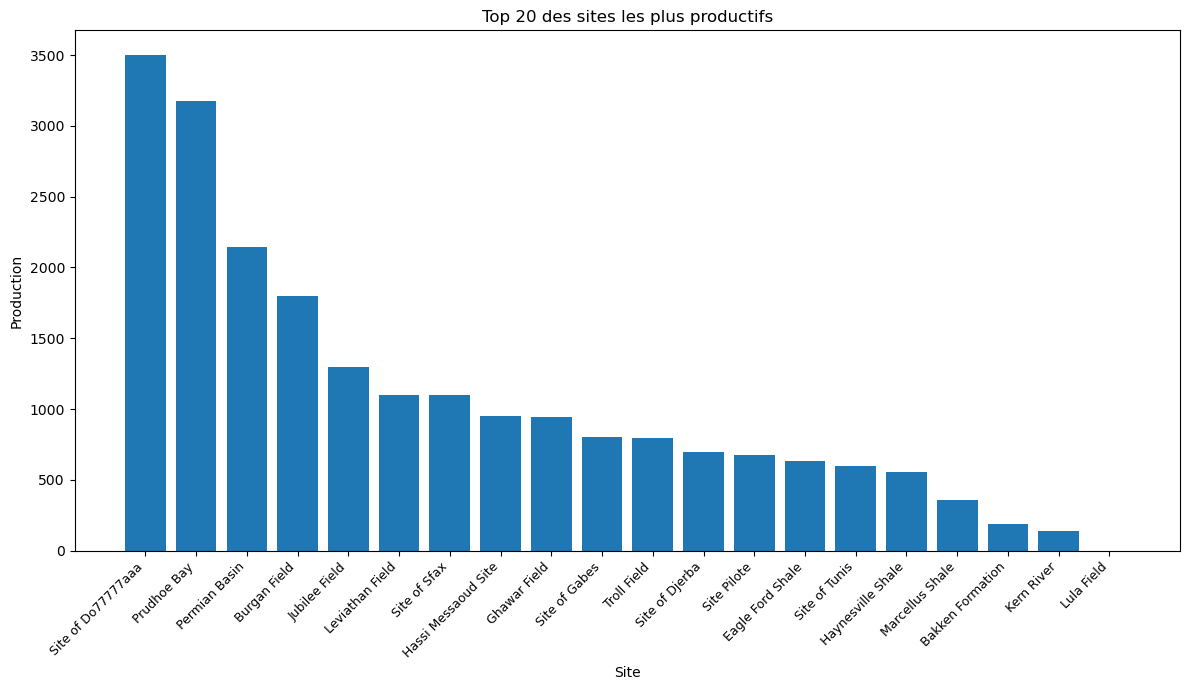

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from src.analytics import production_totale_par_site

# ================== Production totale par site ==================
data_site = production_totale_par_site()

# Création du DataFrame
df_site = pd.DataFrame(data_site, columns=["Site", "Production"])

# TOP 20 sites les plus productifs
top20 = df_site.sort_values(by="Production", ascending=False).head(20)

plt.figure(figsize=(12,7))
plt.bar(top20["Site"], top20["Production"])
plt.title("Top 20 des sites les plus productifs")
plt.xlabel("Site")
plt.ylabel("Production")
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()


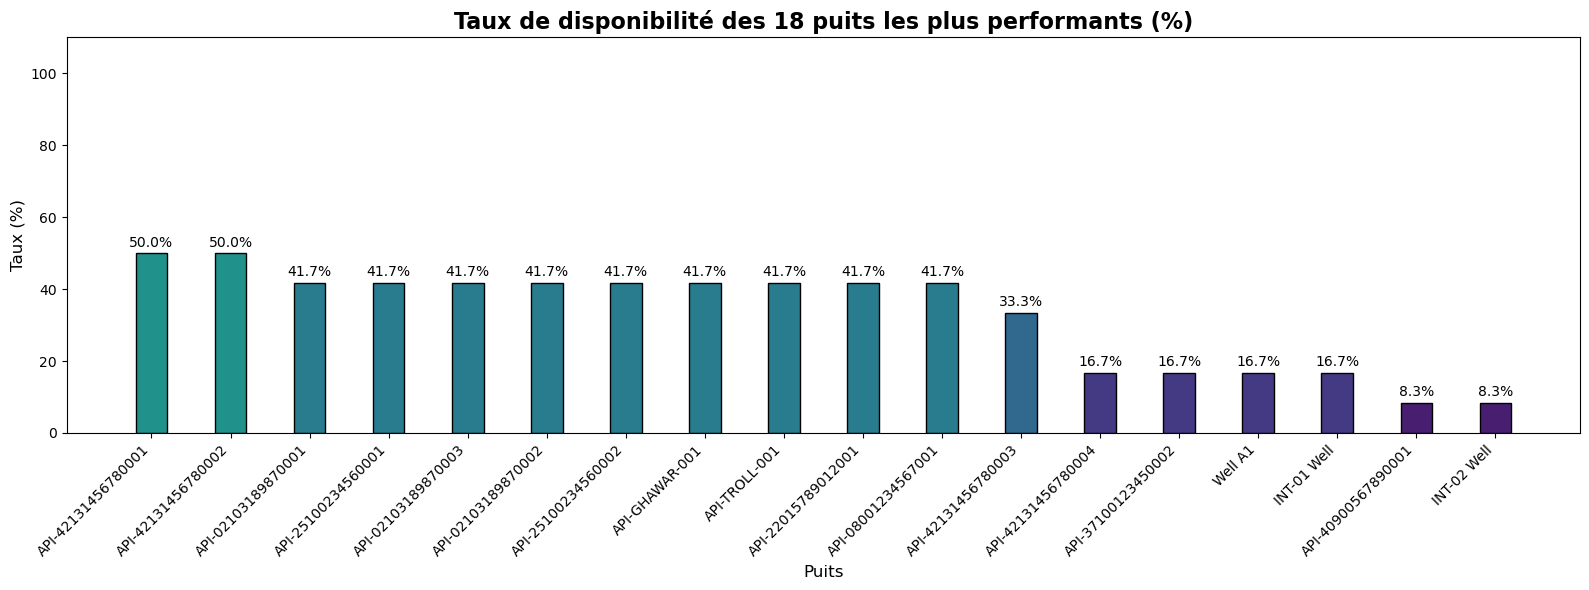

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.analytics import taux_disponibilite_puits


# Données
data_dispo = taux_disponibilite_puits()
df_dispo = pd.DataFrame(data_dispo, columns=["Well", "Jours_prod", "Total_jours", "Taux"])

# Tri par taux décroissant
df_dispo = df_dispo.sort_values(by="Taux", ascending=False)

# Limiter à 18 puits
df_dispo = df_dispo.head(18)

# Indices pour les barres
indices = np.arange(len(df_dispo))
largeur_barre = 0.4  # plus fine pour plus d'espacement

plt.figure(figsize=(16,6))
bars = plt.bar(indices, df_dispo["Taux"], width=largeur_barre,
               color=plt.cm.viridis(df_dispo["Taux"]/100), edgecolor='black')

# Ajouter les valeurs au-dessus des barres
for i, t in enumerate(df_dispo["Taux"]):
    plt.text(indices[i], t + 1, f'{t:.1f}%', ha='center', va='bottom', fontsize=10)

# Étiquettes et titre
plt.xticks(indices, df_dispo["Well"], rotation=45, ha='right', fontsize=10)
plt.xlabel("Puits", fontsize=12)
plt.ylabel("Taux (%)", fontsize=12)
plt.title("Taux de disponibilité des 18 puits les plus performants (%)", fontsize=16, fontweight='bold')
plt.ylim(0, 110)

plt.tight_layout()
plt.show()



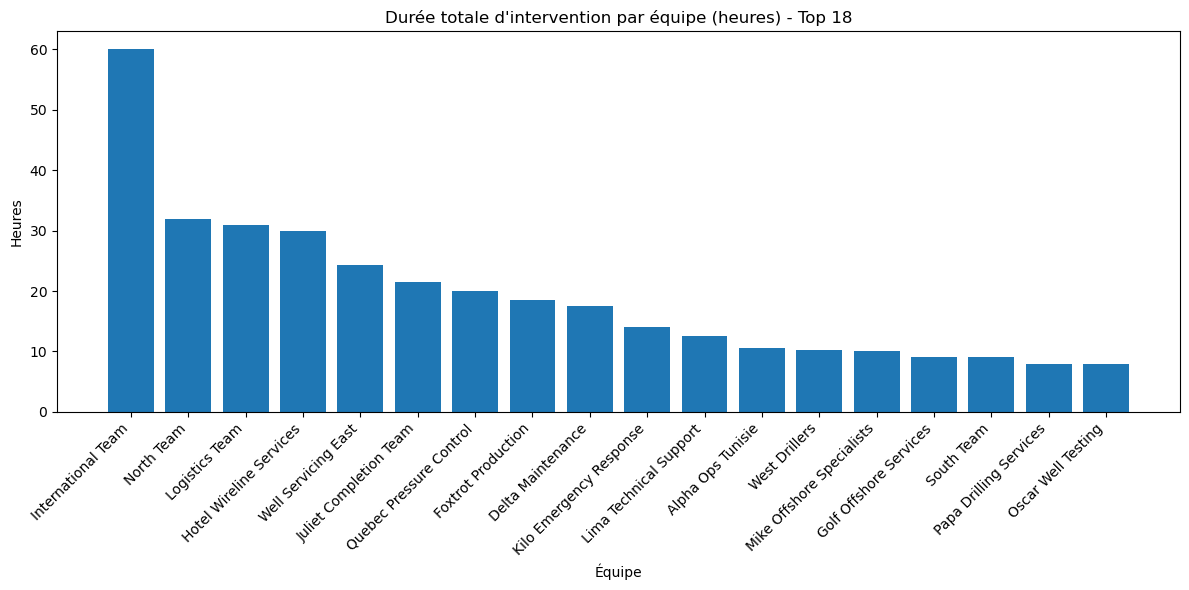

In [22]:
from src.analytics import rendement_par_equipe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Préparation des données
data_team = rendement_par_equipe()
df_team = pd.DataFrame(data_team, columns=["Team", "Heures"])

# Triez les données par 'Heures' de manière décroissante
df_team_sorted = df_team.sort_values(by="Heures", ascending=False)

# Limitez-vous aux 20 premières équipes
df_top_20 = df_team_sorted.head(18)

# 2. Configuration du graphique pour l'espacement
# Augmentez la taille de la figure pour donner plus d'espace aux étiquettes
plt.figure(figsize=(12, 6)) # Taille augmentée (ex: de 8x5 à 12x6)

plt.bar(df_top_20["Team"], df_top_20["Heures"])

# 3. Paramètres d'affichage
plt.title("Durée totale d'intervention par équipe (heures) - Top 18")
plt.xlabel("Équipe")
plt.ylabel("Heures")

# Ajustez la rotation des étiquettes de l'axe X. 
# Une rotation à 45° ou 60° est courante, mais 45° peut suffire avec la plus grande figure.
plt.xticks(rotation=45, ha='right') 

# Optionnel : Ajustez les marges pour s'assurer que les étiquettes ne sont pas coupées
plt.tight_layout() 

plt.show()

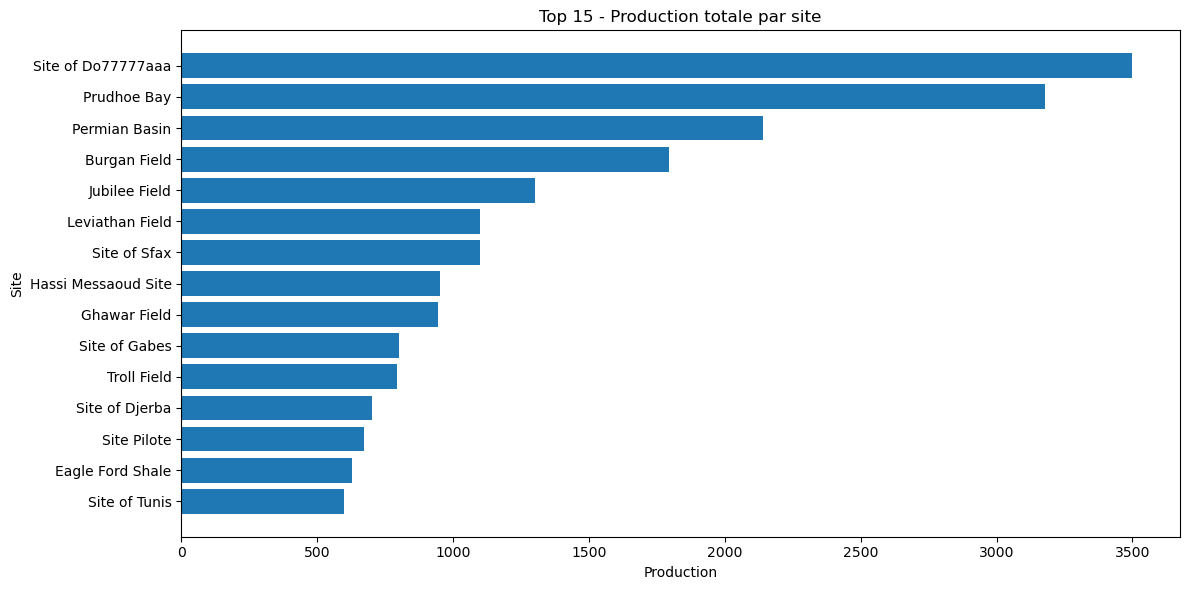

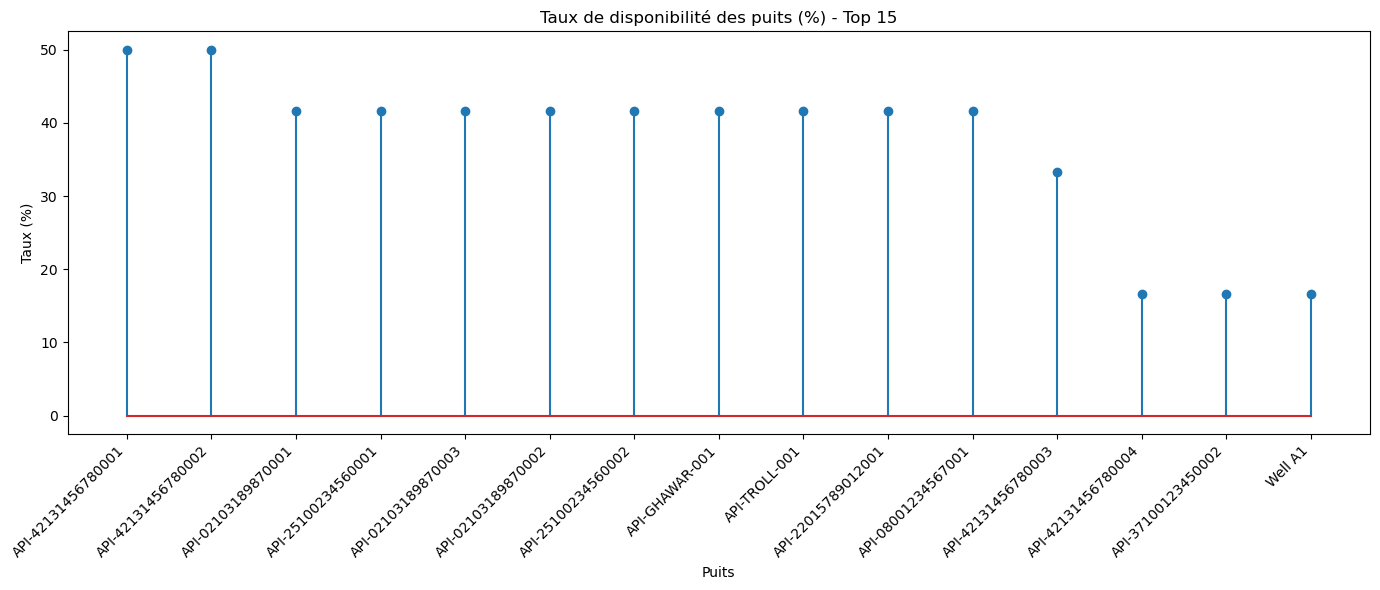

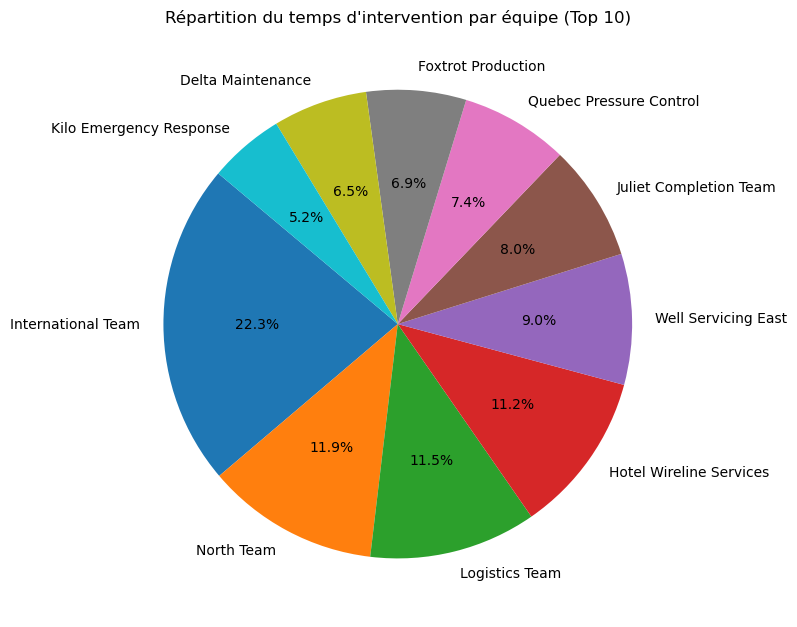

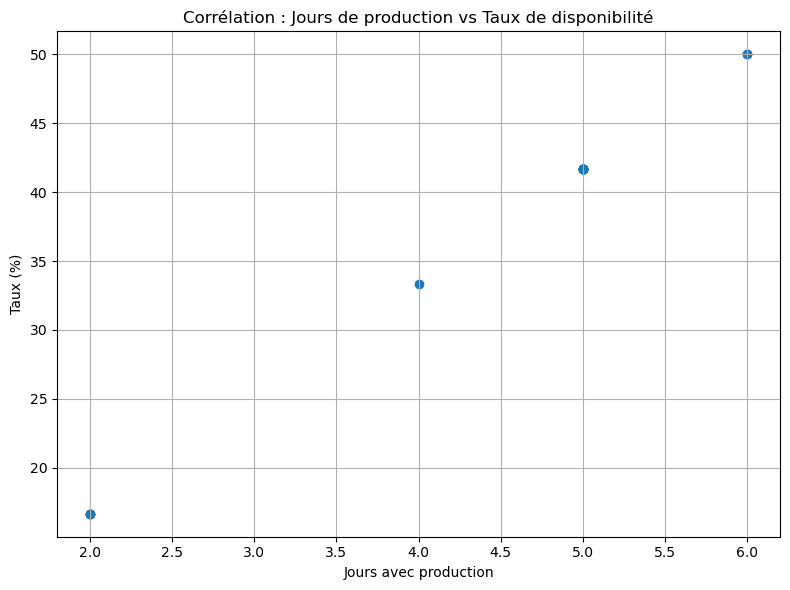

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.analytics import production_totale_par_site, taux_disponibilite_puits, rendement_par_equipe

# =========================
# 1. PRODUCTION PAR SITE - Bar chart horizontal (plus lisible)
# =========================
data_site = production_totale_par_site()
df_site = pd.DataFrame(data_site, columns=["Site", "Production"])
top_sites = df_site.sort_values(by="Production", ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.barh(top_sites["Site"], top_sites["Production"])
plt.title("Top 15 - Production totale par site")
plt.xlabel("Production")
plt.ylabel("Site")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# =========================
# 2. DISPONIBILITÉ DES PUITS - Lollipop chart
# =========================
data_dispo = taux_disponibilite_puits()
df_dispo = pd.DataFrame(data_dispo, columns=["Well", "Jours_prod", "Total_jours", "Taux"])
df_dispo = df_dispo.sort_values(by="Taux", ascending=False).head(15)

plt.figure(figsize=(14,6))
plt.stem(df_dispo["Well"], df_dispo["Taux"])
plt.title("Taux de disponibilité des puits (%) - Top 15")
plt.xlabel("Puits")
plt.ylabel("Taux (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# =========================
# 3. RENDEMENT PAR ÉQUIPE - Pie chart
# =========================
data_team = rendement_par_equipe()
df_team = pd.DataFrame(data_team, columns=["Team", "Heures"])
df_team = df_team.sort_values(by="Heures", ascending=False).head(10)

plt.figure(figsize=(8,8))
plt.pie(df_team["Heures"], labels=df_team["Team"], autopct='%1.1f%%', startangle=140)
plt.title("Répartition du temps d'intervention par équipe (Top 10)")
plt.tight_layout()
plt.show()


# =========================
# 4. CORRÉLATION - Scatter plot
# =========================
plt.figure(figsize=(8,6))
plt.scatter(df_dispo["Jours_prod"], df_dispo["Taux"])
plt.title("Corrélation : Jours de production vs Taux de disponibilité")
plt.xlabel("Jours avec production")
plt.ylabel("Taux (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import sqlite3

conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

cursor.execute("""
SELECT id, well_id, timestamp, flow_rate, pressure, temperature, quantity_produced 
FROM production
""")

for prod_id, well_id, timestamp, flow_rate, pressure, temperature, quantity_produced in cursor.fetchall():
    print(f"Prod ID: {prod_id} | Well: {well_id} | Date: {timestamp} | Qte: {quantity_produced} | Flow: {flow_rate} | Pression: {pressure} | Temp: {temperature}")


conn.close()


Prod ID: 1 | Well: 1 | Date: 2025-01-01 | Qte: 120.0 | Flow: 350.5 | Pression: 2400.0 | Temp: 88.5
Prod ID: 2 | Well: 1 | Date: 2025-02-01 | Qte: 123.5 | Flow: 355.0 | Pression: 2490.0 | Temp: 91.2
Prod ID: 3 | Well: 1 | Date: 2025-03-01 | Qte: 118.5 | Flow: 348.25 | Pression: 2380.0 | Temp: 87.8
Prod ID: 4 | Well: 1 | Date: 2025-04-01 | Qte: 125.2 | Flow: 360.75 | Pression: 2510.0 | Temp: 92.1
Prod ID: 5 | Well: 1 | Date: 2025-05-01 | Qte: 128.0 | Flow: 365.0 | Pression: 2550.0 | Temp: 93.5
Prod ID: 6 | Well: 1 | Date: 2025-06-01 | Qte: 122.5 | Flow: 358.5 | Pression: 2420.0 | Temp: 90.2
Prod ID: 7 | Well: 2 | Date: 2025-01-01 | Qte: 100.0 | Flow: 290.0 | Pression: 2350.0 | Temp: 82.0
Prod ID: 8 | Well: 2 | Date: 2025-02-01 | Qte: 105.5 | Flow: 295.5 | Pression: 2390.0 | Temp: 84.5
Prod ID: 9 | Well: 2 | Date: 2025-03-01 | Qte: 98.0 | Flow: 285.75 | Pression: 2310.0 | Temp: 80.8
Prod ID: 10 | Well: 2 | Date: 2025-04-01 | Qte: 108.0 | Flow: 298.0 | Pression: 2420.0 | Temp: 86.2
Prod ID

In [2]:
import sqlite3

conn = sqlite3.connect("data/oil_production.db")
cursor = conn.cursor()

cursor.execute("""
SELECT id, well_id, incident_type, severity, date, description, resolved
FROM incidents
""")

for id_incident, well_id, incident_type, severity, date, description, resolved in cursor.fetchall():
    etat = "Résolu" if resolved == 1 else "Non résolu"
    print(f"""
Incident ID : {id_incident}
Well ID     : {well_id}
Type        : {incident_type}
Gravité     : {severity}
Date        : {date}
Description: {description}
État        : {etat}
-------------------------------
""")

conn.close()



Incident ID : 1
Well ID     : 1
Type        : Blowout
Gravité     : High
Date        : 2024-12-21
Description: Pressurization exceeded control threshold. Contained, no injuries.
État        : Résolu
-------------------------------


Incident ID : 2
Well ID     : 2
Type        : Leak
Gravité     : Medium
Date        : 2024-11-12
Description: Detected small tubing leak, repaired during workover.
État        : Résolu
-------------------------------


Incident ID : 3
Well ID     : 1
Type        : Valve Failure
Gravité     : Low
Date        : 2025-01-18
Description: Valve replacement required due to slow response.
État        : Résolu
-------------------------------


Incident ID : 4
Well ID     : 3
Type        : Equipment Failure
Gravité     : Medium
Date        : 2025-02-05
Description: Pump failure, replaced with backup unit.
État        : Résolu
-------------------------------


Incident ID : 5
Well ID     : 4
Type        : Pressure Spike
Gravité     : High
Date        : 2025-03-12
Des